### Função para reproducibilidade dos modelos

In [135]:
def set_all_seeds():  
  # Para reproducibilidade
  # Seed value
  # Apparently you may use different seed values at each stage
  seed_value= 0

  # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
  import os
  os.environ['PYTHONHASHSEED']=str(seed_value)

  # 2. Set `python` built-in pseudo-random generator at a fixed value
  import random
  random.seed(seed_value)

  # 3. Set `numpy` pseudo-random generator at a fixed value
  import numpy as np
  np.random.seed(seed_value)

  # 4. Set the `tensorflow` pseudo-random generator at a fixed value
  import tensorflow as tf
  tf.random.set_seed(seed_value)
  # for later versions: 
  # tf.compat.v1.set_random_seed(seed_value)

  # 5. Configure a new global `tensorflow` session
  from keras import backend as K
  # session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  # sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
  # K.set_session(sess)
  # for later versions:
  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)

#Importar base

In [6]:
# Importação dos pacotes

import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go

In [7]:
df = pd.read_csv('Walmart.csv', header=0, parse_dates=True,squeeze=True) 
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#Modelagem da base - Separação da store 1 e vendas semanais

In [8]:
df = df[(df['Store'] == 1)]
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,28-09-2012,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,05-10-2012,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,12-10-2012,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,19-10-2012,1508068.77,0,67.97,3.594,223.425723,6.573


In [9]:
df=df[df['Store']==1][['Date','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]

df=df.set_index('Date')

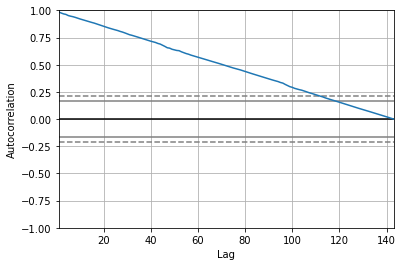

In [10]:
# elimina os warnings das bibliotecas

import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(df)
pyplot.show()

In [11]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [12]:
window = 20
dataSize = len(df)
x = []
y = []

for i in range(window, dataSize):
    x.append(list(df.iloc[i-window:i,0]) + 
             list(df.iloc[i-window:i,1]) +
             list(df.iloc[i-window:i,2]) +
             list(df.iloc[i-window:i,3]) +
             list(df.iloc[i-window:i,4]) +
             list(df.iloc[i-window:i,5])
            )
    y.append(df.iloc[i,0])  

x, y = np.array(x), np.array(y)

In [13]:
print(x.shape)
print(y.shape)

(123, 120)
(123,)


In [14]:
import random
np.random.seed(0) #semente inicial (reprodução de resultados)

#Separação entre Treino e Teste   
#Normalização



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
n_exogens = 6       # quantidade de séries exógenas
x_train_4norm = x_train.reshape(-1,n_exogens,window)

scalers = {}
for i in range(n_exogens):
    scalers[i] = StandardScaler()
    x_train_4norm[:, i, :] = scalers[i].fit_transform(x_train_4norm[:, i, :])
x_train = x_train_4norm.reshape(-1,(n_exogens*window))

In [17]:
x_test_4norm = x_test.reshape(-1,n_exogens,window)

for i in range(n_exogens):
    x_test_4norm[:, i, :] = scalers[i].transform(x_test_4norm[:, i, :])
x_test = x_test_4norm.reshape(-1,(n_exogens*window))

In [18]:
#normalizar
# from sklearn.preprocessing import StandardScaler

# scaler_x = StandardScaler().fit(x_train)
# x_train = scaler_x.transform(x_train)
# x_test = scaler_x.transform(x_test)
scaler_y = StandardScaler().fit(y_train.reshape(-1,1))
y_train = scaler_y.transform(y_train.reshape(-1,1))
y_test = scaler_y.transform(y_test.reshape(-1,1))

#Modelo Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state=0)
regressor.fit(x_train, y_train);

In [20]:
y_pred = regressor.predict(x_test)
y_pred[0:5]

array([ 0.0282225 ,  0.30597327, -0.23152058,  0.17311729, -0.79945575])

In [21]:
y_prev = scaler_y.inverse_transform(y_pred.reshape(-1,1))
y_real = scaler_y.inverse_transform(y_test.reshape(-1,1))

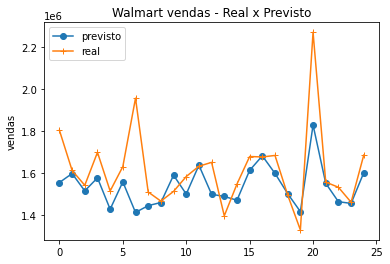

In [22]:
plt.plot(y_prev, label='previsto', marker='o')
plt.plot(y_real, label='real', marker='+')
plt.ylabel("vendas")
plt.title("Walmart vendas - Real x Previsto")
plt.legend()
plt.show()

In [23]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_prev,y_real))
print('RMSE: ', rmse)

RMSE:  163645.05497855233


In [24]:
# 26779704018.933414
# 13907932487.546913
mse = mean_squared_error(y_prev,y_real)
print('MSE: ',mse)

MSE:  26779704018.933414


In [25]:
mape = np.mean(np.abs((y_real - y_prev) / y_real)) * 100
print('MAPE: ',mape, '%')

MAPE:  5.764193008350617 %


In [26]:
from sklearn.metrics import r2_score
r2_score(y_prev,y_real)

-2.051266650416047

In [27]:
rmspe = np.sqrt(np.mean(np.square(((y_real - y_prev) / y_real)), axis=0)) * 100
print('rmspe: ',rmspe, '%')

rmspe:  [8.51515159] %


In [28]:
#prevendo 12 passos a frente
timesteps_to_predict = 12
df_lag = df.iloc[-window:,:]
lag = []
for i in range(window, len(df_lag)+1):
    lag.append(list(df_lag.iloc[i-window:i,0]) + 
              list(df_lag.iloc[i-window:i,1]) +
              list(df_lag.iloc[i-window:i,2]) +
              list(df_lag.iloc[i-window:i,3]) +
              list(df_lag.iloc[i-window:i,4]) +
              list(df_lag.iloc[i-window:i,5])
              )
lag = np.array(lag)

predictions=[]
for i in range(timesteps_to_predict):
  lag_4norm = lag.reshape(-1,n_exogens,window)
  for i in range(n_exogens):
      lag_4norm[:, i, :] = scalers[i].transform(lag_4norm[:, i, :])
  lag = lag_4norm.reshape(-1,(n_exogens*window))
  
  prediction = regressor.predict(lag)
  prediction_to_add = scaler_y.inverse_transform(prediction.reshape(-1,1)) #scaler_y
  predictions.append(prediction_to_add)

  lag_4norm = lag_4norm.reshape(-1,n_exogens,window)
  for i in range(n_exogens):
      lag_4norm[:, i, :] = scalers[i].inverse_transform(lag_4norm[:, i, :])
  lag = lag_4norm.reshape(-1,(n_exogens*window))

  # break

  lag = lag[0, 1:]
  lag = np.insert(lag, window-1, prediction_to_add)   
#   lag = np.append(lag, prediction_to_add)

predictions = np.array(predictions).reshape(-1)

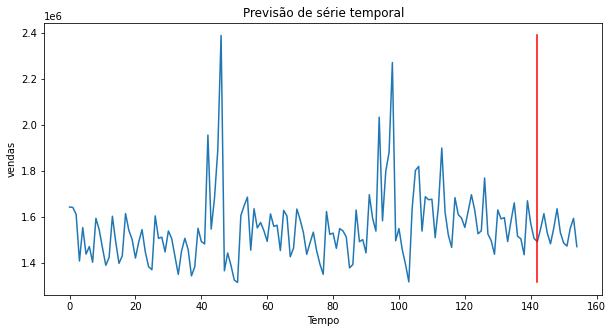

In [29]:
all_data = np.vstack((df.iloc[:,0].values.tolist() + predictions.tolist()))
plt.figure(figsize=(10,5))
plt.plot(all_data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('vendas')

# marca o início das previsões
x = [len(df)-1, len(df)-1]
y = [df['Weekly_Sales'].min(), df['Weekly_Sales'].max()]
plt.plot(x, y, color='red')

#salva o gráfico
plt.show()

#Modelo Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor()
regressor1.fit(x_train, y_train);

In [31]:
y_pred1 = regressor1.predict(x_test)
y_pred1[0:5]

array([ 1.76016115,  0.31675821, -0.27104856,  0.22713733, -0.33605295])

In [32]:
y_prev1 = scaler_y.inverse_transform(y_pred1.reshape(-1,1))
y_real1 = scaler_y.inverse_transform(y_test.reshape(-1,1))

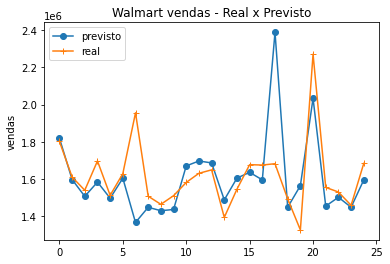

In [33]:
plt.plot(y_prev1, label='previsto', marker='o')
plt.plot(y_real1, label='real', marker='+')
plt.ylabel("vendas")
plt.title("Walmart vendas - Real x Previsto")
plt.legend()
plt.show()

In [34]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_prev1,y_real1))
print('RMSE: ', rmse)

RMSE:  203595.01682796996


In [35]:
mse = mean_squared_error(y_prev1,y_real1)
print('MSE: ',mse)

MSE:  41450930877.18137


In [36]:
mape = np.mean(np.abs((y_real1 - y_prev1) / y_real1)) * 100
print('MAPE: ',mape, '%')

MAPE:  6.863090146584494 %


In [37]:
from sklearn.metrics import r2_score
r2_score(y_pred1,y_test)

0.07579983938537205

In [38]:
rmspe = np.sqrt(np.mean(np.square(((y_real1 - y_prev1) / y_real1)), axis=0)) * 100
print('rmspe: ',rmspe, '%')

rmspe:  [11.68523346] %


In [39]:
#prevendo 12 passos a frente
timesteps_to_predict = 12
df_lag = df.iloc[-window:,:]
lag = []
for i in range(window, len(df_lag)+1):
    lag.append(list(df_lag.iloc[i-window:i,0]) + 
              list(df_lag.iloc[i-window:i,1]) +
              list(df_lag.iloc[i-window:i,2]) +
              list(df_lag.iloc[i-window:i,3]) +
              list(df_lag.iloc[i-window:i,4]) +
              list(df_lag.iloc[i-window:i,5])
              )
lag = np.array(lag)

predictions=[]
for i in range(timesteps_to_predict):
  lag_4norm = lag.reshape(-1,n_exogens,window)
  for i in range(n_exogens):
      lag_4norm[:, i, :] = scalers[i].transform(lag_4norm[:, i, :])
  lag = lag_4norm.reshape(-1,(n_exogens*window))
  
  prediction = regressor.predict(lag)
  prediction_to_add = scaler_y.inverse_transform(prediction.reshape(-1,1)) #scaler_y
  predictions.append(prediction_to_add)

  lag_4norm = lag_4norm.reshape(-1,n_exogens,window)
  for i in range(n_exogens):
      lag_4norm[:, i, :] = scalers[i].inverse_transform(lag_4norm[:, i, :])
  lag = lag_4norm.reshape(-1,(n_exogens*window))

  # break

  lag = lag[0, 1:]
  lag = np.insert(lag, window-1, prediction_to_add)   
#   lag = np.append(lag, prediction_to_add)

predictions = np.array(predictions).reshape(-1)

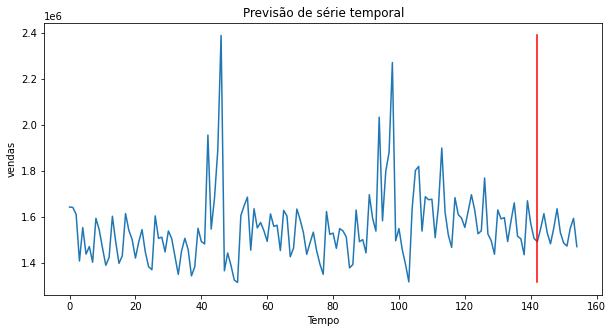

In [40]:
all_data = np.vstack((df.iloc[:,0].values.tolist() + predictions.tolist()))
plt.figure(figsize=(10,5))
plt.plot(all_data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('vendas')

# marca o início das previsões
x = [len(df)-1, len(df)-1]
y = [df['Weekly_Sales'].min(), df['Weekly_Sales'].max()]
plt.plot(x, y, color='red')

#salva o gráfico
plt.show()


#RNN

In [41]:
# Rede Neural"""
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

RN = Sequential()
RN.add(Dense(32,input_shape = x_train.shape[1:], activation = 'tanh'))
RN.add(Dense(16))
RN.add(Dense(1))
RN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3872      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [42]:
x_train[:2]

array([[ 2.29674052e+00,  5.13696323e-01, -2.27382072e-01,
        -5.37539603e-01,  7.25610306e-01,  2.94724607e-01,
         2.19385293e-01,  4.17451905e-02,  4.83499572e-01,
         1.04743589e+00,  3.59763128e-01, -2.03879829e-01,
        -9.10199872e-02,  1.64762866e+00, -2.63244060e-01,
        -3.92809454e-01, -8.19535408e-01,  3.37448197e-01,
         1.45822102e-01,  1.79809896e-01, -3.17999364e-01,
        -2.77350098e-01, -2.55376959e-01, -2.77350098e-01,
        -2.77350098e-01, -2.31869448e-01, -2.98142397e-01,
        -2.55376959e-01, -2.31869448e-01, -2.06284249e-01,
        -2.77350098e-01, -2.98142397e-01, -2.55376959e-01,
        -2.98142397e-01, -2.55376959e-01, -2.77350098e-01,
        -2.77350098e-01, -2.77350098e-01, -2.98142397e-01,
        -3.17999364e-01,  2.53124826e-01,  1.37129901e-01,
        -3.85198757e-02, -3.89613699e-04,  5.40209597e-01,
         3.66972838e-01,  1.09493641e-01,  6.12582933e-01,
         6.67814119e-01,  6.66690331e-01,  7.33136522e-0

In [43]:
y_train[:2]

array([[-0.35777103],
       [-1.28317501]])

In [44]:
RN.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy']) 
history = RN.fit(x_train ,y_train, epochs = 100, validation_split=0.2)# Gráfico do treinamento: custo do treino e validação


Epoch 1/100
3/3 [==============================] - 1s 87ms/step - loss: 1.2480 - accuracy: 0.0000e+00 - val_loss: 0.6042 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.9972 - accuracy: 0.0000e+00 - val_loss: 0.5911 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 0.8883 - accuracy: 0.0000e+00 - val_loss: 0.6459 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 0.8085 - accuracy: 0.0000e+00 - val_loss: 0.6344 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.7283 - accuracy: 0.0000e+00 - val_loss: 0.6067 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 0.6754 - accuracy: 0.0000e+00 - val_loss: 0.6101 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6510 - accuracy: 0.0000e+00 - val_loss

In [45]:
y_pred3 = RN.predict(x_test)
y_pred3


array([[ 2.6342556 ],
       [ 1.5080571 ],
       [ 0.33163455],
       [ 0.55260396],
       [-0.8664857 ],
       [-0.8152887 ],
       [ 1.5994434 ],
       [-0.6335083 ],
       [-0.634181  ],
       [-1.4911537 ],
       [ 0.74520504],
       [ 0.8234077 ],
       [ 1.5442171 ],
       [ 0.5803344 ],
       [-0.23114082],
       [ 0.74246186],
       [ 1.7647941 ],
       [ 0.74686295],
       [ 0.06859663],
       [ 0.42140946],
       [ 2.8736644 ],
       [ 1.4701055 ],
       [-0.83298403],
       [-0.7279664 ],
       [-0.32521138]], dtype=float32)

In [46]:
y_prev3 = scaler_y.inverse_transform(y_pred3.reshape(-1,1))
y_real = scaler_y.inverse_transform(y_test.reshape(-1,1))

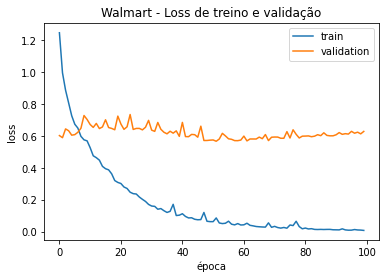

In [47]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Walmart - Loss de treino e validação')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

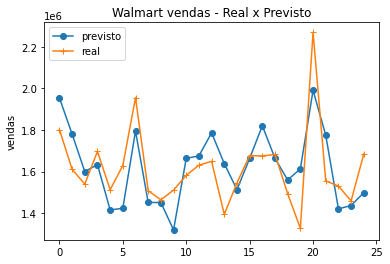

In [48]:
plt.plot(y_prev3, label='previsto', marker='o')
plt.plot(y_real, label='real', marker='+')
plt.ylabel("vendas")
plt.title("Walmart vendas - Real x Previsto")
plt.legend()
plt.show()

In [49]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_prev3,y_real))
print('RMSE: ', rmse)

RMSE:  147799.1411034998


In [50]:
mse = mean_squared_error(y_prev3,y_real)
print('MSE: ',mse)

MSE:  21844586110.932247


In [51]:
mape = np.mean(np.abs((y_real - y_prev3) / y_real)) * 100
print('MAPE: ',mape, '%')

MAPE:  7.586861928961305 %


In [52]:
from sklearn.metrics import r2_score
r2_score(y_pred3,y_test)

0.25950694799020957

In [53]:
rmspe = np.sqrt(np.mean(np.square(((y_real - y_prev3) / y_real)), axis=0)) * 100
print('rmspe: ',rmspe, '%')

rmspe:  [9.28600371] %


In [54]:

#prevendo 12 passos a frente
timesteps_to_predict = 12
df_lag = df.iloc[-window:,:]
lag = []
for i in range(window, len(df_lag)+1):
    lag.append(list(df_lag.iloc[i-window:i,0]) + 
              list(df_lag.iloc[i-window:i,1]) +
              list(df_lag.iloc[i-window:i,2]) +
              list(df_lag.iloc[i-window:i,3]) +
              list(df_lag.iloc[i-window:i,4]) +
              list(df_lag.iloc[i-window:i,5])
              )
lag = np.array(lag)

predictions=[]
for i in range(timesteps_to_predict):
  lag_4norm = lag.reshape(-1,n_exogens,window)
  for i in range(n_exogens):
      lag_4norm[:, i, :] = scalers[i].transform(lag_4norm[:, i, :])
  lag = lag_4norm.reshape(-1,(n_exogens*window))
  
  prediction = regressor.predict(lag)
  prediction_to_add = scaler_y.inverse_transform(prediction.reshape(-1,1)) #scaler_y
  predictions.append(prediction_to_add)

  lag_4norm = lag_4norm.reshape(-1,n_exogens,window)
  for i in range(n_exogens):
      lag_4norm[:, i, :] = scalers[i].inverse_transform(lag_4norm[:, i, :])
  lag = lag_4norm.reshape(-1,(n_exogens*window))

  # break

  lag = lag[0, 1:]
  lag = np.insert(lag, window-1, prediction_to_add)   
#   lag = np.append(lag, prediction_to_add)

predictions = np.array(predictions).reshape(-1)

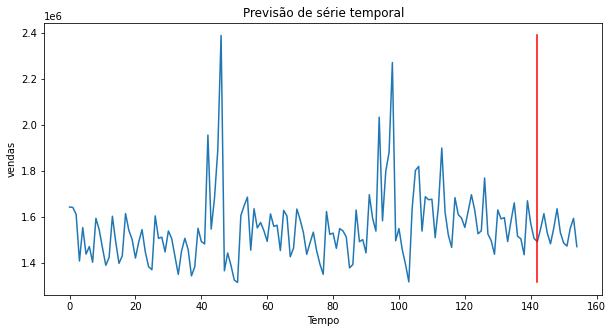

In [55]:
all_data = np.vstack((df.iloc[:,0].values.tolist() + predictions.tolist()))
plt.figure(figsize=(10,5))
plt.plot(all_data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('vendas')

# marca o início das previsões
x = [len(df)-1, len(df)-1]
y = [df['Weekly_Sales'].min(), df['Weekly_Sales'].max()]
plt.plot(x, y, color='red')

#salva o gráfico
plt.show()


# LSTM

In [76]:
# LSTM  with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, Flatten
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [77]:
x_train.shape, x_test.shape

((98, 120), (25, 120))

In [78]:
y_train.shape, y_test.shape

((98, 1), (25, 1))

In [203]:
# reshape input to be [samples, time steps, features]
x_train_reshaped = numpy.reshape(x_train, (x_train.shape[0],-1, x_train.shape[1]))
x_test_reshaped = numpy.reshape(x_test, (x_test.shape[0], -1, x_test.shape[1]))

set_all_seeds()
# create and fit the LSTM network
model = Sequential()
model.add(Bidirectional(LSTM(16, return_sequences=True),input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
model.add(Dropout(0.2))
# model.add(BatchNormalization())

# batchnorm
model.add(Bidirectional(LSTM(4, return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

model.add(Flatten())

# novas dense
model.add(Dense(4))
model.add(Dropout(0.2))
# model.add(BatchNormalization())
# novas dense
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', metrics=['mse'], optimizer='adam')


monitor='val_loss'
lr_reduce = ReduceLROnPlateau(monitor=monitor, factor=0.6, min_delta=0.0001, patience=6, verbose=1)
early = EarlyStopping(monitor=monitor,mode="min",patience=25)
callbacks_list = [early, lr_reduce]

history = model.fit(x_train_reshaped, y_train, epochs = 500, batch_size = 16, callbacks=callbacks_list, validation_data=(x_test_reshaped, y_test))



Epoch 1/500
7/7 [==============================] - 12s 275ms/step - loss: 1.0030 - mse: 1.0030 - val_loss: 1.5767 - val_mse: 1.5767 - lr: 0.0010
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 0.9421 - mse: 0.9421 - val_loss: 1.5643 - val_mse: 1.5643 - lr: 0.0010
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 0.9426 - mse: 0.9426 - val_loss: 1.5467 - val_mse: 1.5467 - lr: 0.0010
Epoch 4/500
7/7 [==============================] - 0s 8ms/step - loss: 0.8953 - mse: 0.8953 - val_loss: 1.5166 - val_mse: 1.5166 - lr: 0.0010
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 0.8841 - mse: 0.8841 - val_loss: 1.4916 - val_mse: 1.4916 - lr: 0.0010
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 0.8667 - mse: 0.8667 - val_loss: 1.4866 - val_mse: 1.4866 - lr: 0.0010
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 0.8547 - mse: 0.8547 - val_loss: 1.4772 - val_mse: 1.4772 - lr: 0.0010
Epo

Train: 0.017, Test: 0.298


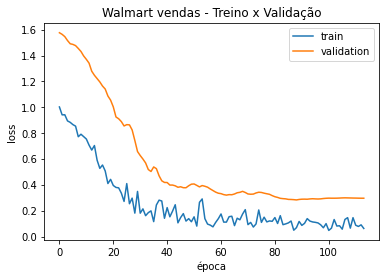

In [204]:
# Gráfico do treinamento: treino e validação
import matplotlib.pyplot as plt
_, train_mse = model.evaluate(x_train_reshaped, y_train, verbose=0)
_, test_mse = model.evaluate(x_test_reshaped, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Walmart vendas - Treino x Validação')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

In [205]:
# make predictions
trainPredict = model.predict(x_train_reshaped)
testPredict = model.predict(x_test_reshaped)
# invert predictions
trainPredict = scaler_y.inverse_transform(trainPredict.reshape(-1,1))
y_train_desnorm = scaler_y.inverse_transform(y_train)
testPredict = scaler_y.inverse_transform(testPredict.reshape(-1,1))
y_test_desnorm = scaler_y.inverse_transform(y_test)

In [206]:
trainPredict[:2]

array([[1501242.1],
       [1368973.1]], dtype=float32)

In [208]:
y_train_desnorm[:2]

array([[1494122.38],
       [1351791.03]])

In [209]:
y_pred4 = model.predict(x_test_reshaped)
y_pred4

array([[ 0.77292097],
       [ 0.7009813 ],
       [-0.20504579],
       [ 0.4419901 ],
       [-0.8643364 ],
       [-0.06732195],
       [ 2.3668106 ],
       [-0.37088865],
       [-0.66256016],
       [ 0.733152  ],
       [-0.03501727],
       [ 0.33182904],
       [ 0.22012627],
       [-0.581418  ],
       [-0.30411914],
       [ 0.8119398 ],
       [ 0.983564  ],
       [ 0.56845427],
       [-0.35808906],
       [-0.15041232],
       [ 3.6178143 ],
       [ 0.15462148],
       [-0.6416983 ],
       [-0.8496931 ],
       [ 0.07335902]], dtype=float32)

In [210]:
y_prev4 = scaler_y.inverse_transform(y_pred4.reshape(-1,1))
y_real = scaler_y.inverse_transform(y_test.reshape(-1,1))

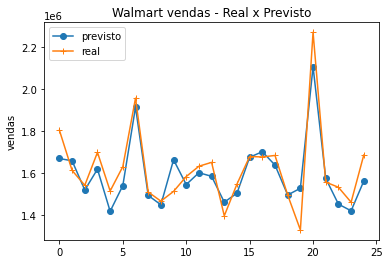

In [211]:
plt.plot(y_prev4, label='previsto', marker='o')
plt.plot(y_real, label='real', marker='+')
plt.ylabel("vendas")
plt.title("Walmart vendas - Real x Previsto")
plt.legend()
plt.show()

In [212]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_prev4,y_real))
print('RMSE: ', rmse)

RMSE:  83895.53845595705


In [213]:
mse = mean_squared_error(y_prev4,y_real)
print('MSE: ',mse)

MSE:  7038461372.814968


In [214]:
mape = np.mean(np.abs((y_real - y_prev4) / y_real)) * 100
print('MAPE: ',mape, '%')

MAPE:  4.077557368384818 %


In [215]:
from sklearn.metrics import r2_score
r2_score(y_pred4,y_test)

0.6893887365788705

In [216]:
rmspe = np.sqrt(np.mean(np.square(((y_real - y_prev4) / y_real)), axis=0)) * 100
print('rmspe: ',rmspe, '%')

rmspe:  [5.29037507] %


In [217]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train_desnorm, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_desnorm, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20009.42 RMSE
Test Score: 83895.54 RMSE


In [218]:
#prevendo 12 passos a frente
timesteps_to_predict = 12
df_lag = df.iloc[-window:,:]
lag = []
for i in range(window, len(df_lag)+1):
    lag.append(list(df_lag.iloc[i-window:i,0]) + 
              list(df_lag.iloc[i-window:i,1]) +
              list(df_lag.iloc[i-window:i,2]) +
              list(df_lag.iloc[i-window:i,3]) +
              list(df_lag.iloc[i-window:i,4]) +
              list(df_lag.iloc[i-window:i,5])
              )
lag = np.array(lag)

predictions=[]
for i in range(timesteps_to_predict):
  lag_4norm = lag.reshape(-1,n_exogens,window)
  for i in range(n_exogens):
      lag_4norm[:, i, :] = scalers[i].transform(lag_4norm[:, i, :])
  lag = lag_4norm.reshape(-1,(n_exogens*window))
  
  prediction = regressor.predict(lag)
  prediction_to_add = scaler_y.inverse_transform(prediction.reshape(-1,1)) #scaler_y
  predictions.append(prediction_to_add)

  lag_4norm = lag_4norm.reshape(-1,n_exogens,window)
  for i in range(n_exogens):
      lag_4norm[:, i, :] = scalers[i].inverse_transform(lag_4norm[:, i, :])
  lag = lag_4norm.reshape(-1,(n_exogens*window))

  # break

  lag = lag[0, 1:]
  lag = np.insert(lag, window-1, prediction_to_add)   
#   lag = np.append(lag, prediction_to_add)

predictions = np.array(predictions).reshape(-1)

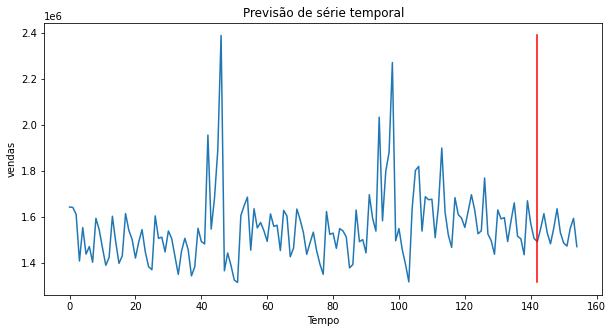

In [219]:
all_data = np.vstack((df.iloc[:,0].values.tolist() + predictions.tolist()))
plt.figure(figsize=(10,5))
plt.plot(all_data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('vendas')

# marca o início das previsões
x = [len(df)-1, len(df)-1]
y = [df['Weekly_Sales'].min(), df['Weekly_Sales'].max()]
plt.plot(x, y, color='red')

#salva o gráfico
plt.show()
